### NOTE TO READERS: Work in Progress
Thank you for taking a look at this file.  I uploaded as a way to demonstrate my ability to program using python, numpy, and pandas, as well as to get feedback on my current project.  If you are reading this, please know that it is a work in progress. There is a breakpoint highlighted below, which shows where my current workflow breaks off into other ideas that I'm exploring.

# Analyzing Baseball Trends (1871-2015)

In this report, I will present the findings of my analysis of baseball trends from 1871 - 2015.  The primary goal of this project was to discover ways in which the game has evolved over time with hopes of uncovering something that may help predict some strategic ideas for franchises to succeed in the future.

In light of the recent analytics boom in baseball, I thought this would be a fun project that may point out some areas where teams could have benefited in the past if they had access to the data analysis capabilities that we have today.

## Questions to Explore

The following is a list of questions I thought might be interesting to explore. I won't be able to dive into all of these, but I will use this list as a guide as I progress through the project.
* What age range are players in they’re prime? Different for batters and pitchers?
* Has this range changed over time?  Are players more productive at older ages now? Longer prime ranges?  Same for batters/pitchers?
* Do hall-of-famers have different prime ranges than non HOFers?
* Are there any stats in particular that are greatly impacted by age?
* How accurately can you predict a player’s career trajectory by his first few seasons’ performances? Has this changed over time?
* How do performances correlate to salaries?
* Can we link performance-salary relations to team performances?
* Why might our findings be the case?  What further analysis might prove helpful?
* What makes a winning team? What stats do winning teams tend to be furthest over league average?  Has this changed over time?
* What stats were valued over time?  Did it change?  Standardize, of course, both stats and salaries.
* How does payroll relate to wins?  Do low payroll teams with high wins have anything in common?

In [410]:
import pandas as pd

# Read each dataset into a pandas DataFrame
franchises_list = pd.read_csv('baseballdatabank-master/core/TeamsFranchises.csv')
batting_stats = pd.read_csv('baseballdatabank-master/core/Batting.csv')
salaries_list = pd.read_csv('baseballdatabank-master/core/Salaries.csv')
fielding_stats = pd.read_csv('baseballdatabank-master/core/Fielding.csv')
teams_list = pd.read_csv('baseballdatabank-master/core/Teams.csv')
   
#print(salaries_list.describe())
#print(salaries_list.head())
#print(teams_list.iloc[0])

## Does Higher Payroll Mean More Wins?
We're going to start with a question that is simple enough to answer: "Does having a higher payroll correllate to winning more games?"

To answer this question, we will first look at a single year, 2015, and plot out a graph of payroll vs. wins for each team.  If payroll and wins are indeed correllated, we would expect to see the number of wins for a team increase as payroll increases.  Let's see...  

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

'''
First we have to determine the payroll of each team. This is a bit
tricky since our dataset doesn't have all the information needed for
complete accuracy, but we can get a good enough estimation for our purposes.
'''

# Set up a dictionary of teams with their wins and set payroll to zero
def get_team_wins(year): 
    team_wins = {}
    teams = teams_list.loc[teams_list['yearID'] == year]['teamID'].values
    for team in teams:
        wins = teams_list.loc[(teams_list['yearID'] == year) & (teams_list['teamID'] == team)]['W'].values[0]
        team_wins[team] = {'wins': wins, 'payroll': 0}
    return team_wins
    
#print(get_team_wins(2015))

In [412]:
# Loop through the players list and add each player's salary
# to his teams payroll
def set_team_payrolls_and_wins(year, team_payrolls_and_wins):
    player_salaries = salaries_list.loc[(salaries_list['yearID'] == year)].values
    for player in player_salaries:
        #print(player)
        team = player[1]
        salary = player[4]
        team_payrolls_and_wins[team]['payroll'] = team_payrolls_and_wins[team]['payroll'] + salary
        #payroll = payroll + salary
        #print(team_payrolls_and_wins[team]['payroll'])
    return team_payrolls_and_wins

# Combine payrolls and wins by team for given year into DataFrame sorted by wins
def get_team_payrolls_and_wins(year):
    w = get_team_wins(year)
    pw = set_team_payrolls_and_wins(year, w)
    pw = pd.DataFrame.from_dict(pw, orient='index')
    return pw.sort_values('wins', ascending=False)

In [413]:
team_payrolls_and_wins_2015 = get_team_payrolls_and_wins(2015)
print(team_payrolls_and_wins_2015)

     wins    payroll
SLN   100  119241500
PIT    98   88892499
CHN    97  115879310
KCA    95  112107025
TOR    93  112992400
LAN    92  215792000
NYN    90   96766683
TEX    88  143742789
NYA    87  212751957
HOU    86   72256200
LAA    85  120005415
SFN    84  164701500
WAS    83  155587472
MIN    83  107755000
CLE    81   87663766
BAL    81  115044833
TBA    80   64521233
ARI    79   61834000
BOS    78  181103400
SEA    76  122208700
CHA    76  112373700
SDN    74  118441300
DET    74  172284750
MIA    71   68056500
OAK    68   79053501
COL    68   95688600
MIL    68  100850000
ATL    67   71781250
CIN    64  113072286
PHI    63  111693000


In [419]:
# Print out some summary statistics
print(team_payrolls_and_wins_2015.describe())

             wins       payroll
count   30.000000  3.000000e+01
mean    80.966667  1.171381e+08
std     10.453455  4.037167e+07
min     63.000000  6.183400e+07
25%     74.000000  9.059152e+07
50%     81.000000  1.126830e+08
75%     87.750000  1.216579e+08
max    100.000000  2.157920e+08


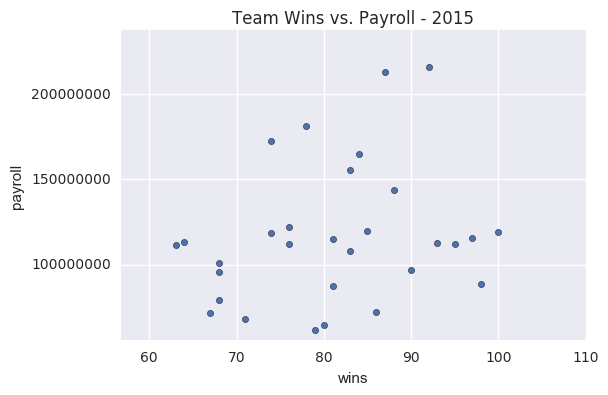

In [414]:
# Plot the data
def plot_team_payrolls_and_wins(year):
    data = get_team_payrolls_and_wins(year)
    max_x = data['wins'].max() + .1*data['wins'].max()
    min_x = data['wins'].min() - .1*data['wins'].min()
    max_y = data['payroll'].max() + .1*data['payroll'].max()
    min_y = data['payroll'].min() - .1*data['payroll'].min()

    f = plt.figure()
    plt.ticklabel_format(style = 'plain')
    title = 'Team Wins vs. Payroll - ' + str(year)
    plt.title(title)
    p = data.plot(kind='scatter', x='wins',y='payroll', ax=f.gca())
    p.set_xlim(min_x, max_x)
    p.set_ylim(min_y, max_y)
    p.get_yaxis().get_major_formatter().set_useOffset(False)
    #sns.lmplot(x='wins',y='payroll',data=data,fit_reg=True) 

plot_team_payrolls_and_wins(2015)

Well that sure doesn't look very convincing! Note the wide spread in the data points. The most wins belonged to a team (STL) with a payroll that was only slightly above average. And the second most wins, belonged to a team (PIT) with a well below average payroll! In fact, teams 2-4 all had below average payrolls. Perhaps it was an unusual year. Let's try 2010...

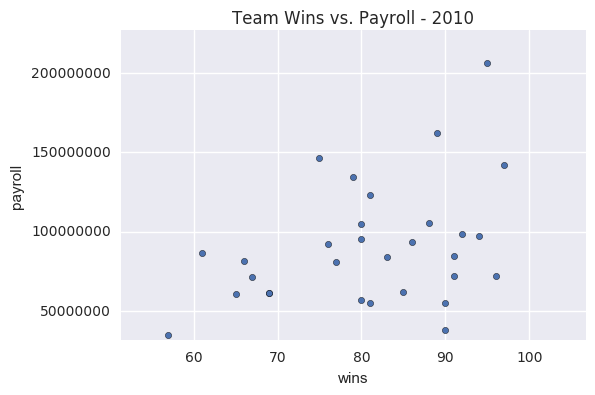

In [415]:
plot_team_payrolls_and_wins(2010)

Maybe a bit more like we expected, but it certainly doesn't appear to be a strong relationship.

Let's try a few more!

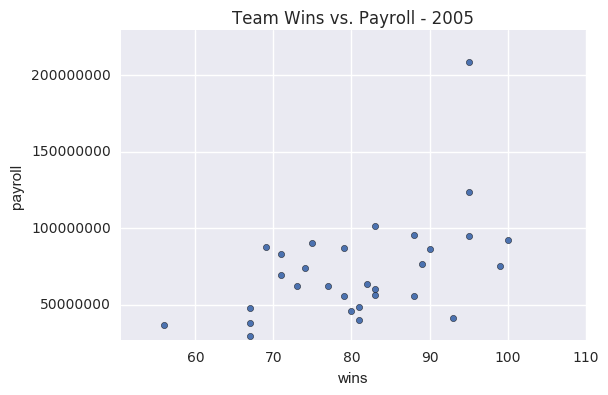

In [416]:
plot_team_payrolls_and_wins(2005)

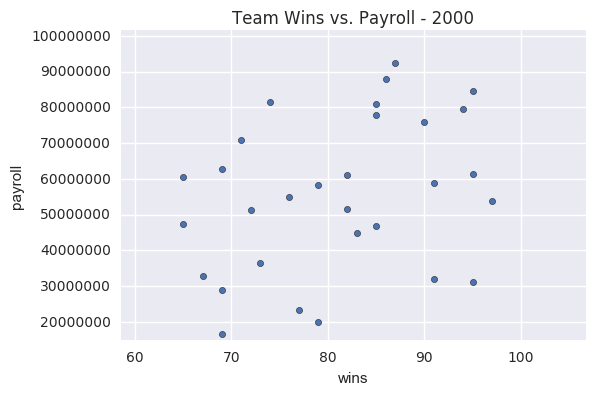

In [417]:
plot_team_payrolls_and_wins(2000)

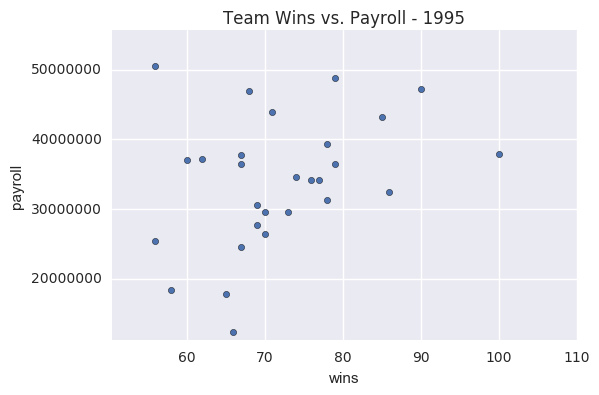

In [418]:
plot_team_payrolls_and_wins(1995)

While, the general trend seems to indicate that more of the high payroll teams tend to have more wins, we'll need to dive into the statistics to get a better understanding of this relationship.

At this point, I think it's best to temper our expectations for a strong correlation and instead anticipate the statistical tests revealing a weak relationship between team payroll and wins.

# \*\*\* NOTE TO READERS \*\*\*
*At this point, everything below this note is a work in progress and not organized to proceed in order from what's above. If you want to browse through it, be my guest! Much of it is part of a side test or some other ideas I want to explore.  My next efforts, however, will be to continue the analysis above with some regression tests followed by some other ideas.*

*Feel free to check back for updates! I should be updating this file every afternoon until further notice.*




-------------------------------------------------------------------------------------------------------------------





### Top 20 Salaries By Year
We begin our deeper exploration by looking at top 20 salaries for each year from 1985 to 2015.  Below is a plot of the average of these top 20 salaries by year.  It's no surprise that this number increased fairly consistently over the 30 year period.  

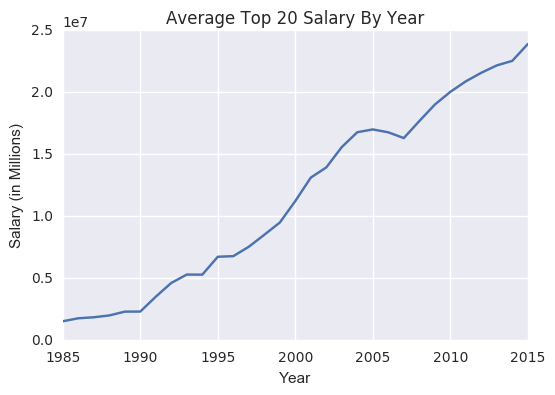

In [203]:

# Break the salaries table into a list of the top 20 salaries per year.
# First, sort the salaries table by year and salary.
# Note that the salaries table begins in 1985.
sorted_salaries = salaries_list.sort_values(['yearID', 'salary'], ascending=False)
min_year = sorted_salaries.loc[:,'yearID'].min()
max_year = sorted_salaries.loc[:,'yearID'].max()

mean_top_20_salaries_by_year = []

for year in range(min_year, max_year + 1):
    top_20 = sorted_salaries.loc[sorted_salaries['yearID'] == year][0:19]
    mean_top_20_salaries_by_year.append({'year': year, 'mean_salary': sorted_salaries.loc[sorted_salaries['yearID'] == year][0:19].loc[:,'salary'].mean()})

s = pd.DataFrame.from_dict(mean_top_20_salaries_by_year, dtype=int).set_index('year')
plt.plot(s)
plt.xlabel("Year")
plt.ylabel("Salary (in Millions)")
plt.title("Average Top 20 Salary By Year")

### The Gap Widens
I thought it might be interesting to get a high level view of all the salary data.  To do this, I created a boxplot of the entire dataset for each year from 1985 to 2015.  These boxplots indicate that there seems to be an acceleration in the gap between the bulk of the players and the biggest earners. While this may not be a shocking revelation, it is important to keep in mind as we investigate deeper.  

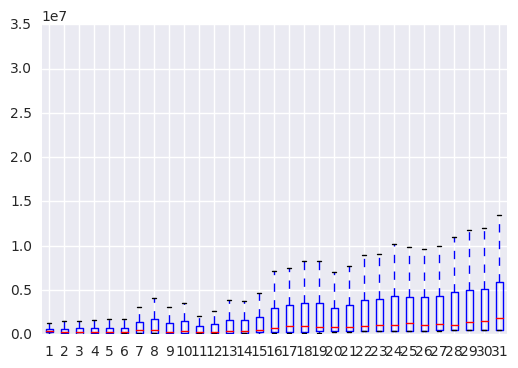

In [152]:
fig = plt.figure()
subplot = plt.subplot(111)
data = []
for year in range(min_year, max_year+1):
    data.append(sorted_salaries.loc[sorted_salaries['yearID'] == year].loc[:,'salary'])
    #mean_top_20_salaries_by_year.append({'year': year, 'mean_salary': sorted_salaries.loc[sorted_salaries['yearID'] == year][0:19].loc[:,'salary'].mean()})
subplot.boxplot(data)
plt.show()

Remember, we are trying to come up with some strategic ideas for building a winning baseball franchise. Let's pause for a moment and think about how the information we have just uncovered relates to this goal.

First, let's think about why such a large gap between the 75th percentile and the top salaries exists.


\*****Note for the non-baseball fan who may read this**:
_In baseball, at any given time you are allowed 25 players on your active roster.  Of these 25 players, you will start eight position players in a game (plus one designated hitter in the American League).  Teams typically carry five starting pitchers on the roster, used on a rotating basis, and six or seven relief pitchers.  The rest are bench players._




## Hitters Worth the Price Tag?
Our goal in this section is to explore whether the top hitters lived up to the lofty expectations indicated by their price tags.  To accomplish this, we should first compare the top salaried hitters with groups of lower salaries and see whether the average stats are in line with the corresponding salary groups. 

In [230]:
## Create a DataFrame of the top 20 salaries amongst hitters for each year,
## Include the hitters stats for that year in the DataFrame

# Make a list of positions that a hitter could be
hitter_positions = ['C', '1B', '2B', 'SS', '3B', 'OF']

# Set up the dictionary
top_20_paid_hitters = []

# Loop through the years and add the top 20 highest salaries each year
# for those with positions in the hitter_positions list
for year in range(max_year, max_year+1):
    count = 0
    rank = 0
    #top_20_paid_hitters[year] = []
    while count < 20:
        pid = sorted_salaries.loc[sorted_salaries['yearID'] == year].iloc[count].loc['playerID']
        positions = fielding_stats.loc[(fielding_stats['playerID'] == pid) & (fielding_stats['yearID'] == year)]
        if bool(set(hitter_positions).intersection(positions['POS'].values)):
            #print(set(hitter_positions).intersection(positions['POS'].values))
            stats = batting_stats.loc[(batting_stats['playerID'] == pid) & (batting_stats['yearID'] == year)]
            top_20_paid_hitters.append(stats)
            rank += 1
        count += 1

top_20_paid_hitters = pd.DataFrame(top_20_paid_hitters) 

In [231]:
print(top_20_paid_hitters)

                                                    0
0            playerID  yearID  stint teamID lgID  ...
1            playerID  yearID  stint teamID lgID  ...
2           playerID  yearID  stint teamID lgID   ...
3            playerID  yearID  stint teamID lgID  ...
4            playerID  yearID  stint teamID lgID  ...
5            playerID  yearID  stint teamID lgID  ...
6            playerID  yearID  stint teamID lgID  ...
7            playerID  yearID  stint teamID lgID  ...
8            playerID  yearID  stint teamID lgID  ...
9            playerID  yearID  stint teamID lgID  ...
10           playerID  yearID  stint teamID lgID  ...
11           playerID  yearID  stint teamID lgID  ...
12          playerID  yearID  stint teamID lgID   ...


In [119]:
print(sorted_salaries.loc[sorted_salaries['yearID'] == 2015].iloc[2].loc['playerID'] in batting_stats['playerID'].tolist())

True


In [104]:
bs = batting_stats['playerID'].tolist()
print(batting_stats.head()['playerID'])

0    abercda01
1     addybo01
2    allisar01
3    allisdo01
4    ansonca01
Name: playerID, dtype: object


In [121]:
fielding_stats.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,NaN,SS,1,NaN,NaN,1.0,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,NaN,NaN,67.0,72.0,42.0,5.0,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,NaN,NaN,8.0,14.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,NaN,NaN,1.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,NaN,NaN,51.0,3.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN


In [204]:
# Make a list of positions that a hitter could be
hitter_positions = ['C', '1B', '2B', 'SS', '3B', 'OF']

# Check if the player's position(s) include those in the list
a = fielding_stats.loc[(fielding_stats['playerID'] == 'allisar01') & (fielding_stats['yearID'] == 1871)]
b = fielding_stats.loc[(fielding_stats['playerID'] == 'kershcl01') & (fielding_stats['yearID'] == 2015)]
print(bool(set(hitter_positions).intersection(a['POS'].values)))
print(bool(set(hitter_positions).intersection(b['POS'].values)))

True
False
